In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")


# STEP 1 — Telemetry Dataset Exploration

Goal: Understand raw telemetry behavior across different channels.
No preprocessing, no modeling, observation only.


In [17]:
import os

# Correct path to the train folder
DATA_PATH = "/home/yuvan/Downloads/archive/data/data/train"

# List files in the train folder
files = sorted(os.listdir(DATA_PATH))
files[:5]  # Preview first 5 files


['A-1.npy', 'A-2.npy', 'A-3.npy', 'A-4.npy', 'A-5.npy']

In [18]:
# Pick the first file from the list
file_to_load = files[0]

# Load the .npy file
x = np.load(os.path.join(DATA_PATH, file_to_load))
print("File loaded:", file_to_load)
print("Shape of the file:", x.shape)


File loaded: A-1.npy
Shape of the file: (2880, 25)


In [19]:
import pandas as pd

# Convert numpy array to DataFrame
df = pd.DataFrame(x)
df.head()  # Shows the first 5 rows
# Basic inspection
print("Shape:", df.shape)           # n_timesteps x n_features
print("Missing values:\n", df.isna().sum())  # Any NaNs?
print("Std per column:\n", df.std())         # See if any column is constant/dead



Shape: (2880, 25)
Missing values:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64
Std per column:
 0     1.110416e-16
1     1.865990e-01
2     9.638638e-02
3     1.663465e-01
4     5.883339e-02
5     3.764286e-01
6     3.462529e-01
7     3.724838e-02
8     1.863390e-02
9     2.634774e-02
10    0.000000e+00
11    3.724838e-02
12    0.000000e+00
13    3.226365e-02
14    3.226365e-02
15    0.000000e+00
16    0.000000e+00
17    1.663465e-01
18    1.663465e-01
19    1.184834e-01
20    4.163771e-02
21    1.925333e-01
22    1.900165e-01
23    0.000000e+00
24    0.000000e+00
dtype: float64


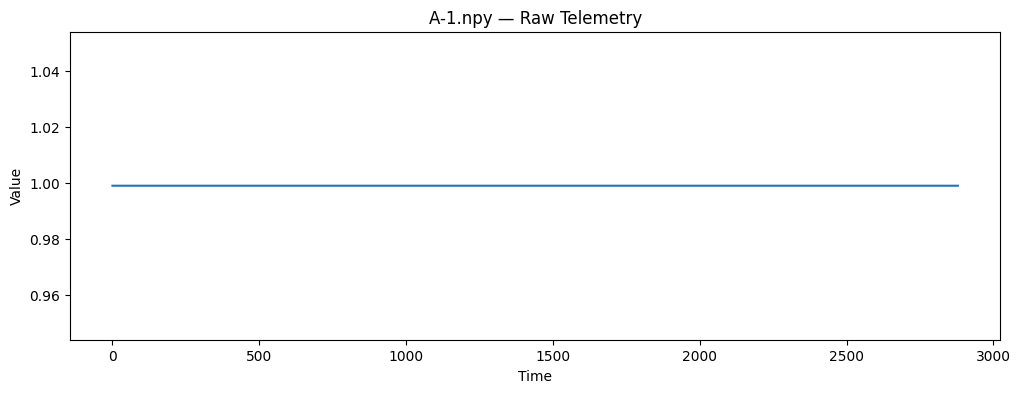

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(df.iloc[:, 0])
plt.title(f"{file_to_load} — Raw Telemetry")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


### Channel A-1

• Primary signal (column 0) is almost flat  
• Very low variance → likely inactive or reference sensor  
• Not useful for detecting dynamic anomalies


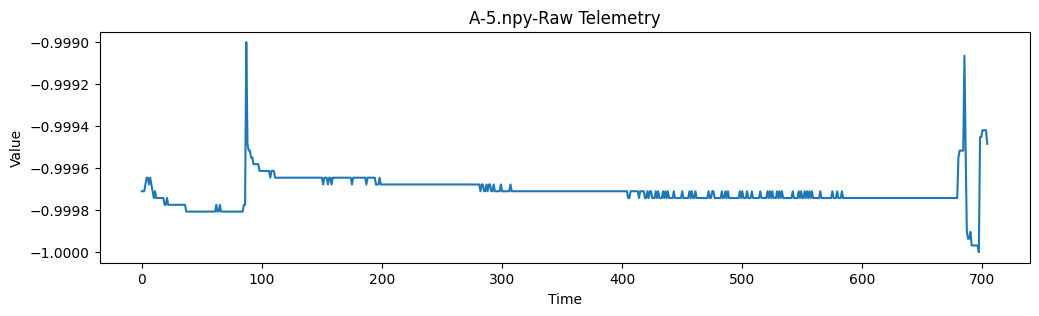

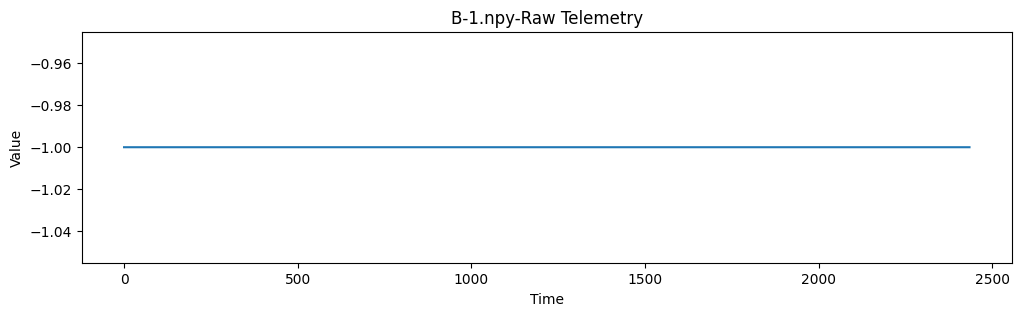

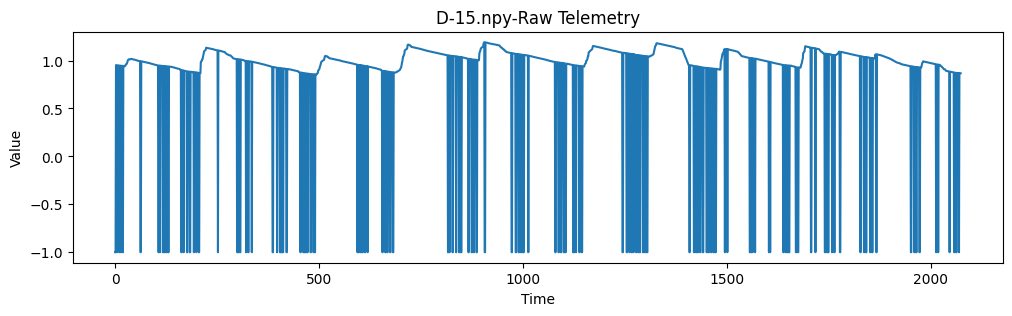

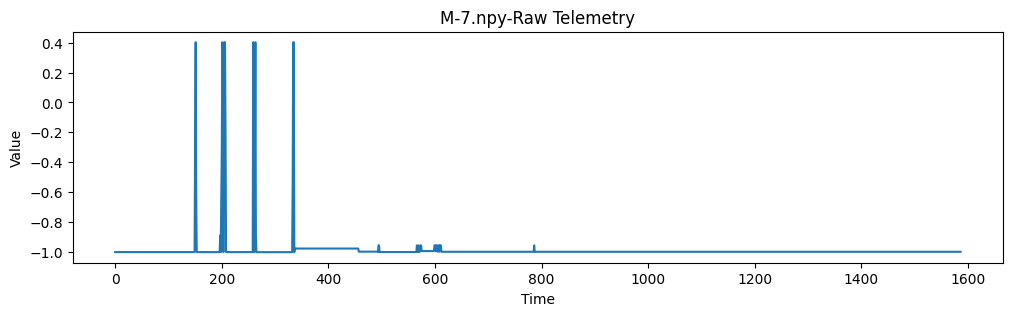

In [21]:
channels_to_check= ["A-5.npy","B-1.npy","D-15.npy","M-7.npy"]
for ch in channels_to_check:
    x= np.load(os.path.join(DATA_PATH, ch))
    df= pd.DataFrame(x)
    plt.figure(figsize=(12,3))
    plt.plot(df.iloc[:,0])
    plt.title(f"{ch}-Raw Telemetry")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()

### Channel A-5

• Signal is mostly flat with occasional step changes 
• Very low variance between steps indicates stable behavior
• Step changes may represent discrete state transition

### Channel B-5

• Signal is nearly constant over time  
• Very low variance indicates stable or inactive behavior  
• Possibly a status, reference, or disabled sensor

### Channel D-15

• Multiple features change simultaneously  
• Dense and thick signal regions indicate high activity  
• Vertical streaks suggest sudden system-wide events  
• Strongly coupled multivariate behavior

### Channel M-7

• Mostly flat baseline with sparse, tall spikes
• Spikes represent rare or event-driven activity
• Baseline quickly returns to normal after each spike

## Sensor Behavior Summary

| Channel | Speed | Noise | Notes |
|-------|-------|-------|-------|
| A-5   | Slow  | Stable | Step-wise, discrete state changes |
| B-5   | Slow  | Stable | Status / reference sensor |
| D-15  | Fast  | Noisy | Strongly multivariate, coupled |
| M-7   | Slow  | Sparse spikes | Mostly flat baseline with rare events |